<a href="https://colab.research.google.com/github/iam-fern/real_data/blob/main/cluster_CHNS_pexam_pub_12_U24BU36U39.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
from google.colab import files
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# where your file is located
FILE_LOCATION = '/content/drive/My Drive/pattern_realdata/pexam_pub_12.sas7bdat'

In [4]:
df = pd.read_sas(FILE_LOCATION)
df
#df.head()

/usr/local/lib/python3.7/dist-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,IDind,U25,U26,U27,U28,U29,U34,U35,U36,U424,...,U16,U17,U18,U19,U1D,CM1,U7_91,U8_91,U9_91,temp
0,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.111010e+11,1.0,28.0,0.0,NaN,360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
2,1.111010e+11,0.0,NaN,NaN,NaN,NaN,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.111010e+11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.4
4,1.111010e+11,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36.7
126404,5.523042e+11,1.0,18.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0
126405,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.1
126406,5.523042e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,37.0


In [5]:
table = df[['IDind', 'U24B', 'U36', 'U39']]
table

,IDind,U24B,U36,U39
0,1.111010e+11,NaN,3.0,NaN
1,1.111010e+11,NaN,NaN,NaN
2,1.111010e+11,62.0,3.0,NaN
3,1.111010e+11,38.0,NaN,NaN
4,1.111010e+11,NaN,NaN,NaN
...,...,...,...,...
126403,5.523040e+11,NaN,NaN,NaN
126404,5.523042e+11,NaN,NaN,NaN
126405,5.523042e+11,NaN,NaN,NaN
126406,5.523042e+11,NaN,NaN,NaN


In [6]:
# Define in which columns to look for missing values.
table1 = table.dropna(subset=['U24B', 'U36', 'U39'])
table1

,IDind,U24B,U36,U39
789,1.113010e+11,-99.0,6.0,-9.0
6347,2.121011e+11,47.0,4.0,2.0
13623,2.311010e+11,52.0,4.0,1.0
13689,2.311010e+11,56.0,5.0,2.0
15563,2.312020e+11,41.0,1.0,1.0
15568,2.312020e+11,44.0,1.0,2.0
23360,3.113020e+11,51.0,3.0,1.0
23429,3.113020e+11,41.0,5.0,1.0
24772,3.122020e+11,52.0,5.0,1.0
25743,3.211021e+11,42.0,5.0,1.0


In [7]:
x = table1[['U36', 'U39']]
y = table1["U24B"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

table_data_new = pd.DataFrame({ "x1"    : table1["U36"],
                                "x2"    : table1['U39'],
                                "y"     : df["Actual"],
                                "y_hat" : df["Predicted"]})
table_data_new["e"] = table_data_new["y"] - table_data_new["y_hat"]
table_data_new

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,x1,x2,y,y_hat,e
789,6.0,-9.0,-99.0,-18.301958,-80.698042
6347,4.0,2.0,47.0,36.269475,10.730525
13623,4.0,1.0,52.0,32.016531,19.983469
13689,5.0,2.0,56.0,32.374948,23.625052
15563,1.0,1.0,41.0,43.700110,-2.700110
15568,1.0,2.0,44.0,47.953054,-3.953054
23360,3.0,1.0,51.0,35.911057,15.088943
23429,5.0,1.0,41.0,28.122005,12.877995
24772,5.0,1.0,52.0,28.122005,23.877995
25743,5.0,1.0,42.0,28.122005,13.877995


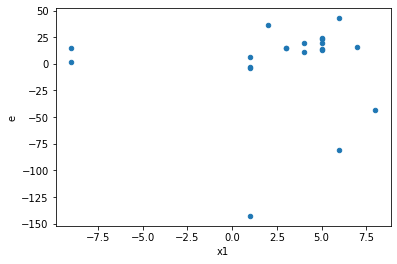

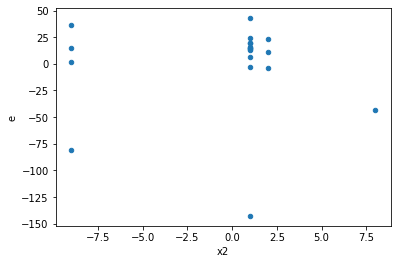

In [8]:
table_data_new.plot(x ='x1', y='e', kind = 'scatter')
table_data_new.plot(x ='x2', y='e', kind = 'scatter')

In [9]:
# where your file is located
FILE_LOCATION1 = '/content/drive/My Drive/pattern_realdata/CHNS_pexam_pub_12_U24BU36U39.csv'
df1 = pd.read_csv(FILE_LOCATION1)
df1

,no,x1,x2,y,y_hat,e
0,1,6,-9,-99,-18.301958,-80.698042
1,2,4,2,47,36.269475,10.730525
2,3,4,1,52,32.016531,19.983469
3,4,5,2,56,32.374948,23.625052
4,5,1,1,41,43.700110,-2.700110
5,6,1,2,44,47.953054,-3.953054
6,7,3,1,51,35.911057,15.088943
7,8,5,1,41,28.122005,12.877995
8,9,5,1,52,28.122005,23.877995
9,10,5,1,42,28.122005,13.877995


In [10]:
# แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean
#Set number of clusters
x = df1[["y_hat"]]
k_means = KMeans(n_clusters=2)
#Run the clustering algorithm
model = k_means.fit(x)
#Generate cluster predictions and store in y_kmeans
#km.fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int32)

In [11]:
# kmean_clusters.astype(float)
kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})
kmean_clusters.head()

,clusters
0,1
1,0
2,0
3,0
4,0


In [12]:
# เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
data_clusters = pd.concat([df1, kmean_clusters], axis=1)
data_clusters

,no,x1,x2,y,y_hat,e,clusters
0,1,6,-9,-99,-18.301958,-80.698042,1
1,2,4,2,47,36.269475,10.730525,0
2,3,4,1,52,32.016531,19.983469,0
3,4,5,2,56,32.374948,23.625052,0
4,5,1,1,41,43.700110,-2.700110,0
5,6,1,2,44,47.953054,-3.953054,0
6,7,3,1,51,35.911057,15.088943,0
7,8,5,1,41,28.122005,12.877995,0
8,9,5,1,52,28.122005,23.877995,0
9,10,5,1,42,28.122005,13.877995,0


In [13]:
# กลุ่มที่ 1
data_cluster0 = data_clusters[data_clusters.clusters == 0]

y = data_cluster0[['y']]
x = data_cluster0[['x1', 'x2']]
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()

DF1 = model1.df_resid + 1
SSE1 = model1.ssr
MSE1 = SSE1/DF1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
DF1

16.0

In [15]:
SSE1

18831.717869458127

In [16]:
MSE1

1176.982366841133

In [18]:
# กลุ่มที่ 2
data_cluster1 = data_clusters[data_clusters.clusters == 1]

y = data_cluster1[['y']]
x = data_cluster1[['x1', 'x2']]
x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit()

DF2 = model2.df_resid + 1
SSE2 = model2.ssr
MSE2 = SSE2/DF2

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [19]:
DF2

1.0

In [20]:
SSE2

0.0

In [21]:
MSE2

0.0

In [24]:
# คำนวณค่าสถิติ
GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)
GQ_test_clusters

0.0

In [25]:
# คำนวณค่า p-value
# pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, DF2, DF1)))
p_greater = ss.f.cdf(GQ_test_clusters, DF2, DF1)
p_less = 1.0-ss.f.cdf(GQ_test_clusters, DF2, DF1)

In [27]:
p_greater

0.0

In [28]:
p_less

1.0

###### The two-tailed p-value equals: 0

###### p( x < 0 ) = 0
###### p( x > 0 ) = 1
###### p( x < 0 ) + p( x >2345.0589) = 0
###### Since p-value ≤ α, H0 is rejected. (0 ≤ 0.05)

https://www.statskingdom.com/p_value.html

In [29]:
Significance = 0.05
if p_greater*2 < Significance:
  print('Reject005=0 : Heteroscedasticity')
else:
  print('Reject005=1 : Homoscedasticity')

Reject005=0 : Heteroscedasticity
